In [ ]:
pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 30.2 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report


In [ ]:
# Load dataset

df = pd.read_csv("sentiment_tweets3.csv")
df.rename(columns={"message to examine": "text", "label (depression result)": "label"}, inplace=True)


In [ ]:
df = df[['text', 'label']]


In [ ]:
# Data Preprocessing
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['text'])
sequences = tokenizer.texts_to_sequences(df['text'])
padded_sequences = pad_sequences(sequences, maxlen=100, padding='post', truncating='post')

In [ ]:
X = np.array(padded_sequences)
y = np.array(df['label'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Build BiLSTM Model
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=100),
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.5),
    Bidirectional(LSTM(32)),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [ ]:
# Compile Model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train Model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/5
258/258 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.8748 - loss: 0.3261 - val_accuracy: 0.9947 - val_loss: 0.0325
Epoch 2/5
258/258 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.9985 - loss: 0.0124 - val_accuracy: 0.9869 - val_loss: 0.0674
Epoch 3/5
258/258 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.9959 - loss: 0.0195 - val_accuracy: 0.9956 - val_loss: 0.0374
Epoch 4/5
258/258 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9980 - loss: 0.0140 - val_accuracy: 0.9952 - val_loss: 0.0332
Epoch 5/5
258/258 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.9991 - loss: 0.0068 - val_accuracy: 0.9947 - val_loss: 0.0442


In [ ]:
# Evaluate Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9967 - loss: 0.0264
Test Accuracy: 0.9947


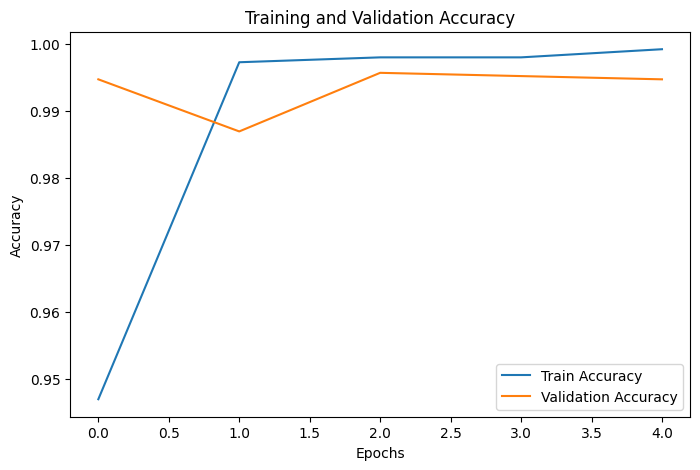

In [ ]:
# Plot Training History
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

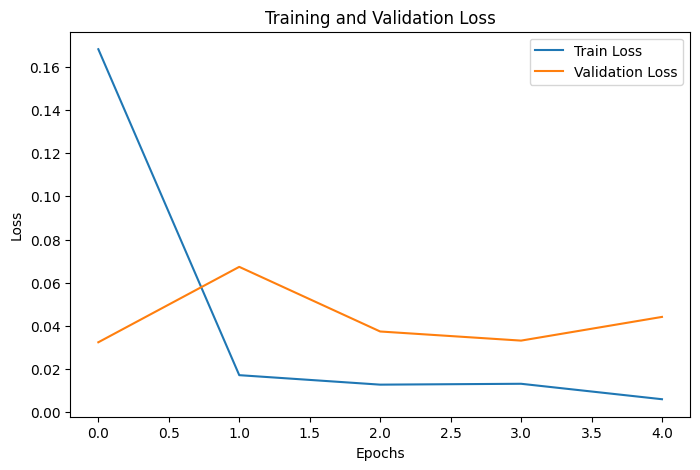

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step


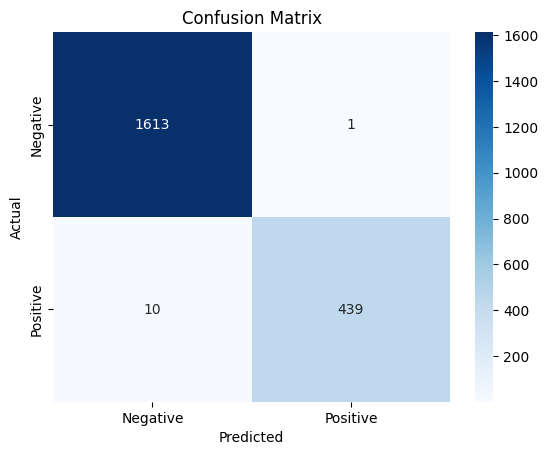

In [ ]:
# Confusion Matrix
y_pred = (model.predict(X_test) > 0.5).astype("int32")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1614
           1       1.00      0.98      0.99       449

    accuracy                           0.99      2063
   macro avg       1.00      0.99      0.99      2063
weighted avg       0.99      0.99      0.99      2063

